To initialize this project, we first import the necessary libraries in order to initialize, search, and show the findings in this dataset. 

In [7]:
import pandas as pd

Additionally, we must store the .csv file in an accesible manner, which, in this case, we are storing it in a Pandas Dataframe, which allows us to easily access the content of each column in the CSV file without having to perform major operations (such as, for example, initializing an MySQL Database).

In [6]:
file_path = 'DataSet.csv' 
df = pd.read_csv(file_path)


Our first hypothesis is to analyze whether or not there is a change in Fiction or Non Fiction trends throughout the years, meaning, whether or not there is a shift in popularity with respect to the genres

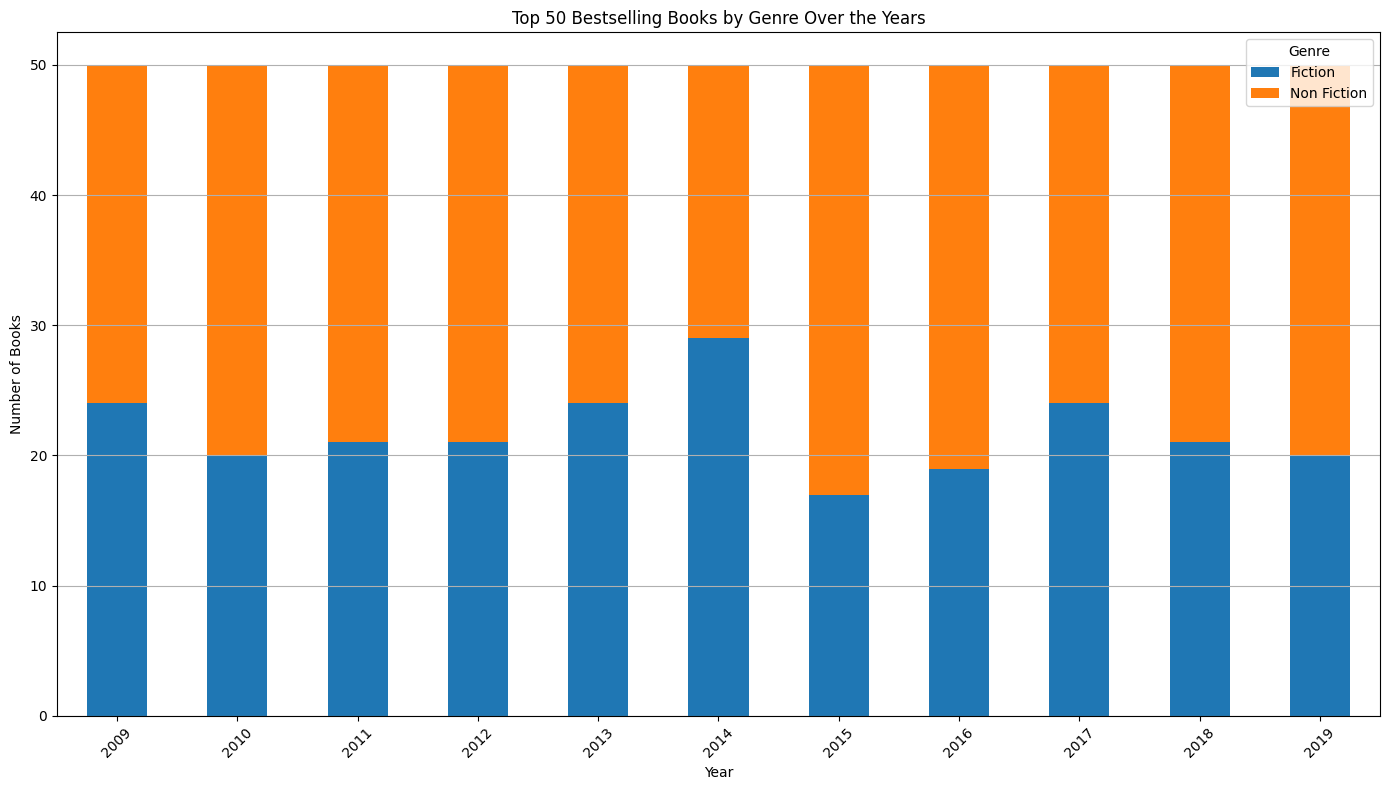

In [9]:
from FinalProjectCode import genre_trend_per_year
genre_trend_per_year(df)